<a href="https://colab.research.google.com/github/debkumarkuila7999/pfsinterns/blob/main/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection Model

#Importing Required Libraries


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#Data Upload & Loading

Upload Data File

In [2]:
# Code to upload the dataset using Google Colab

from google.colab import files  # Importing Colab's file handling library

# Trigger file upload dialog
uploaded = files.upload()  # This will allow you to browse and upload a file from your local system


Saving creditcard.csv to creditcard.csv


Load and Display the Dataset

In [3]:
# Load the data into a pandas DataFrame
data = pd.read_csv('creditcard.csv')
data.head(10)  # Display the first 10 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
 # Display the last 10 rows of the dataset
data.tail(10)

# Exploratory Data Analysis (EDA)


--- Basic Dataset Information ---
Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Summary Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.2

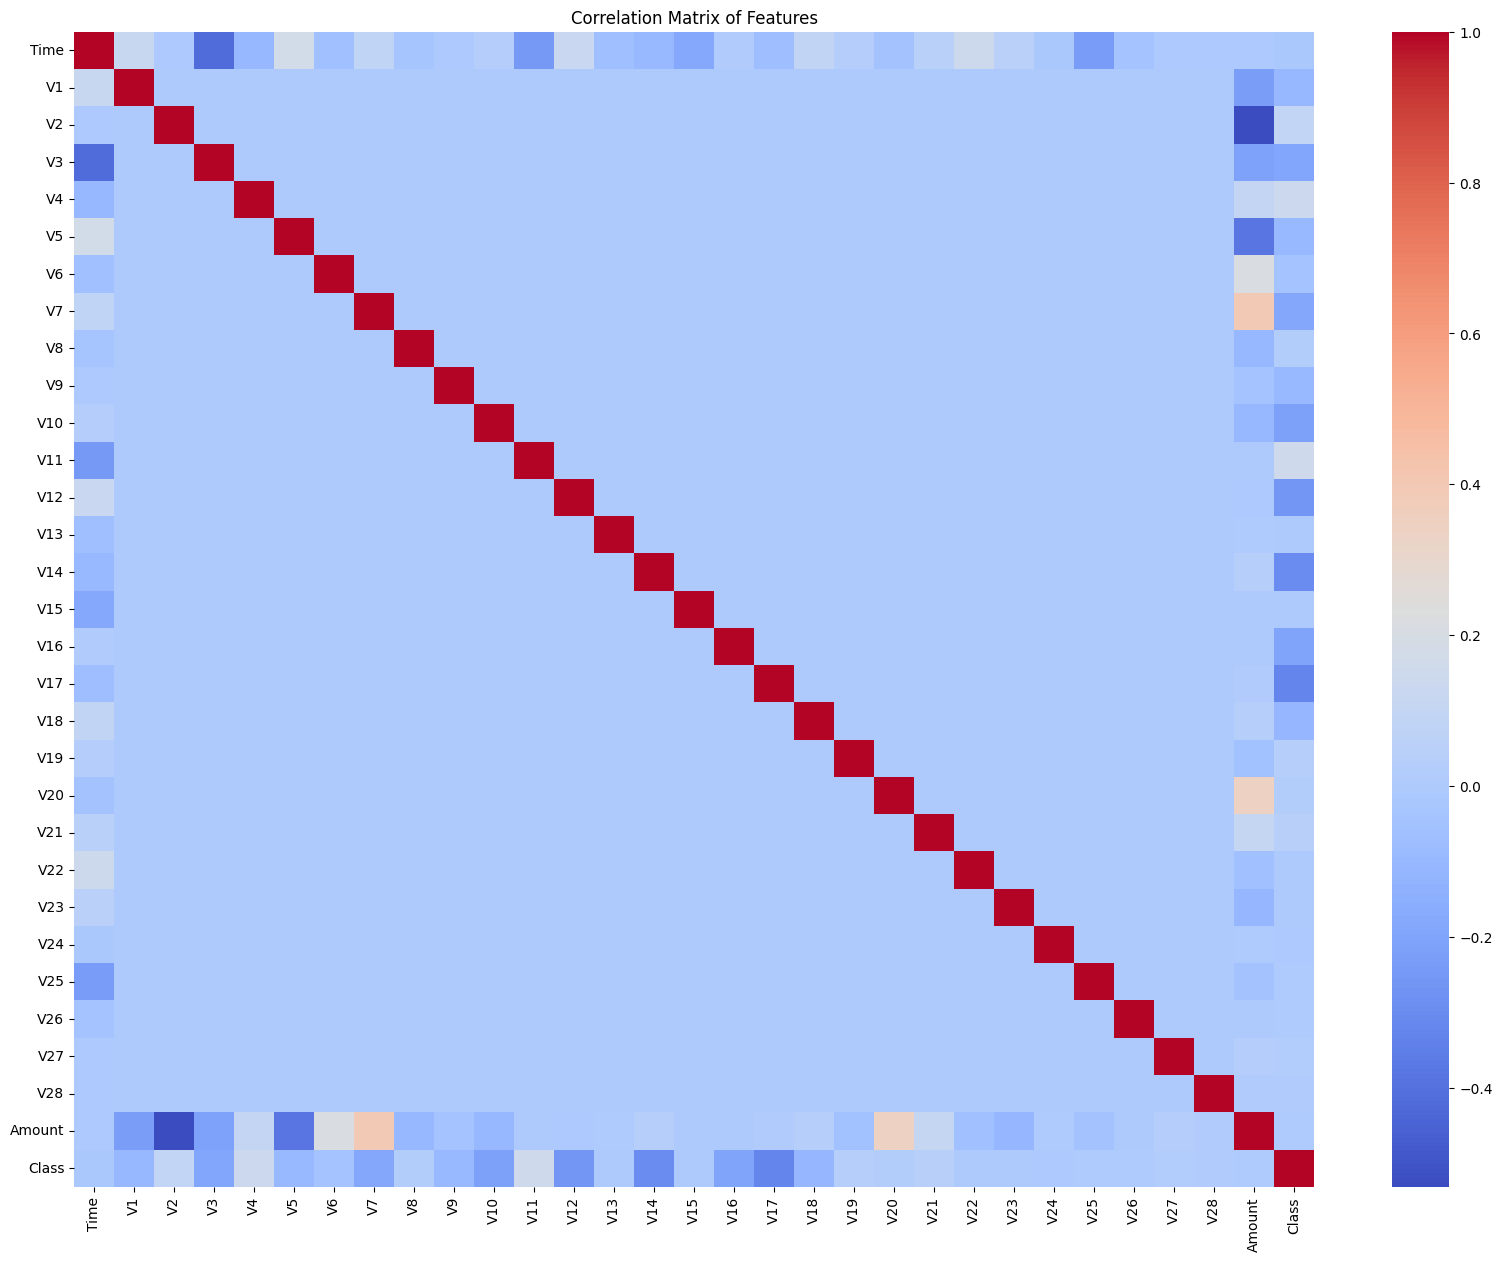


--- Class Distribution ---


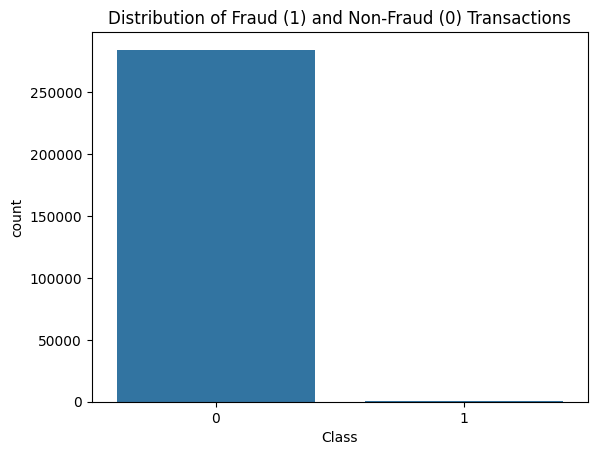

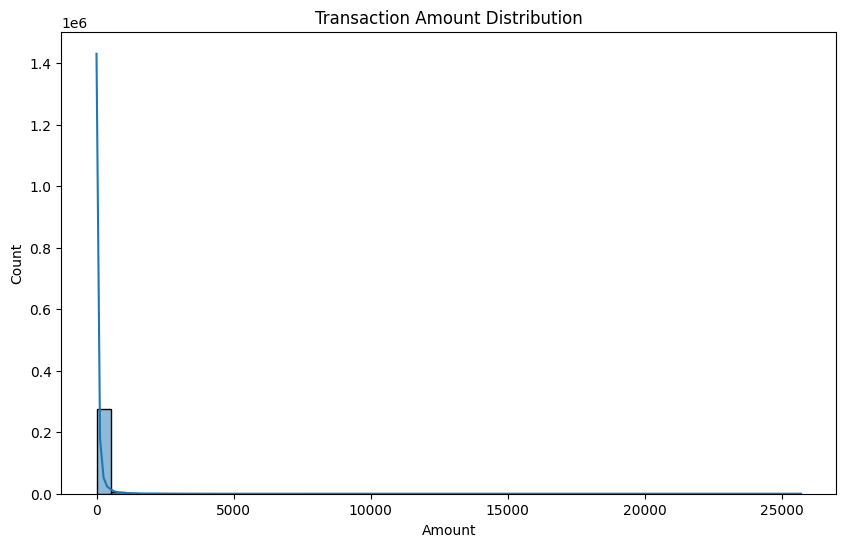

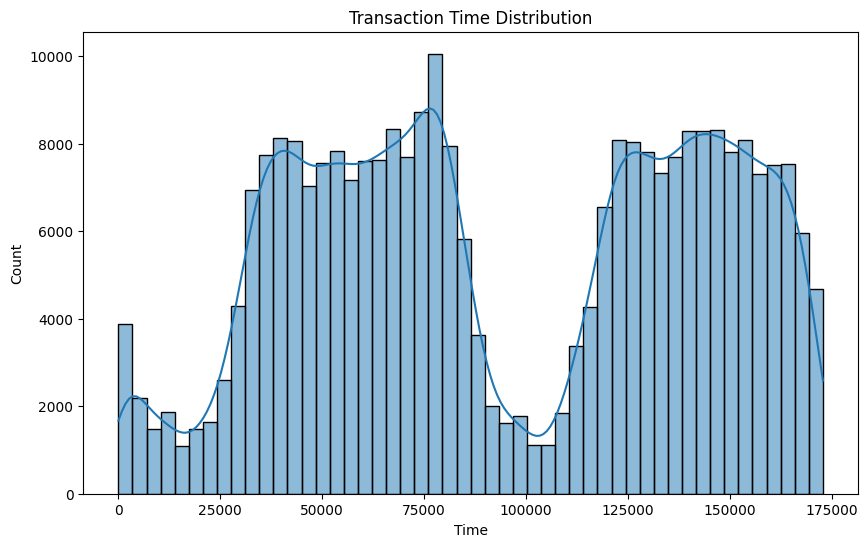


--- Feature Distribution Analysis ---


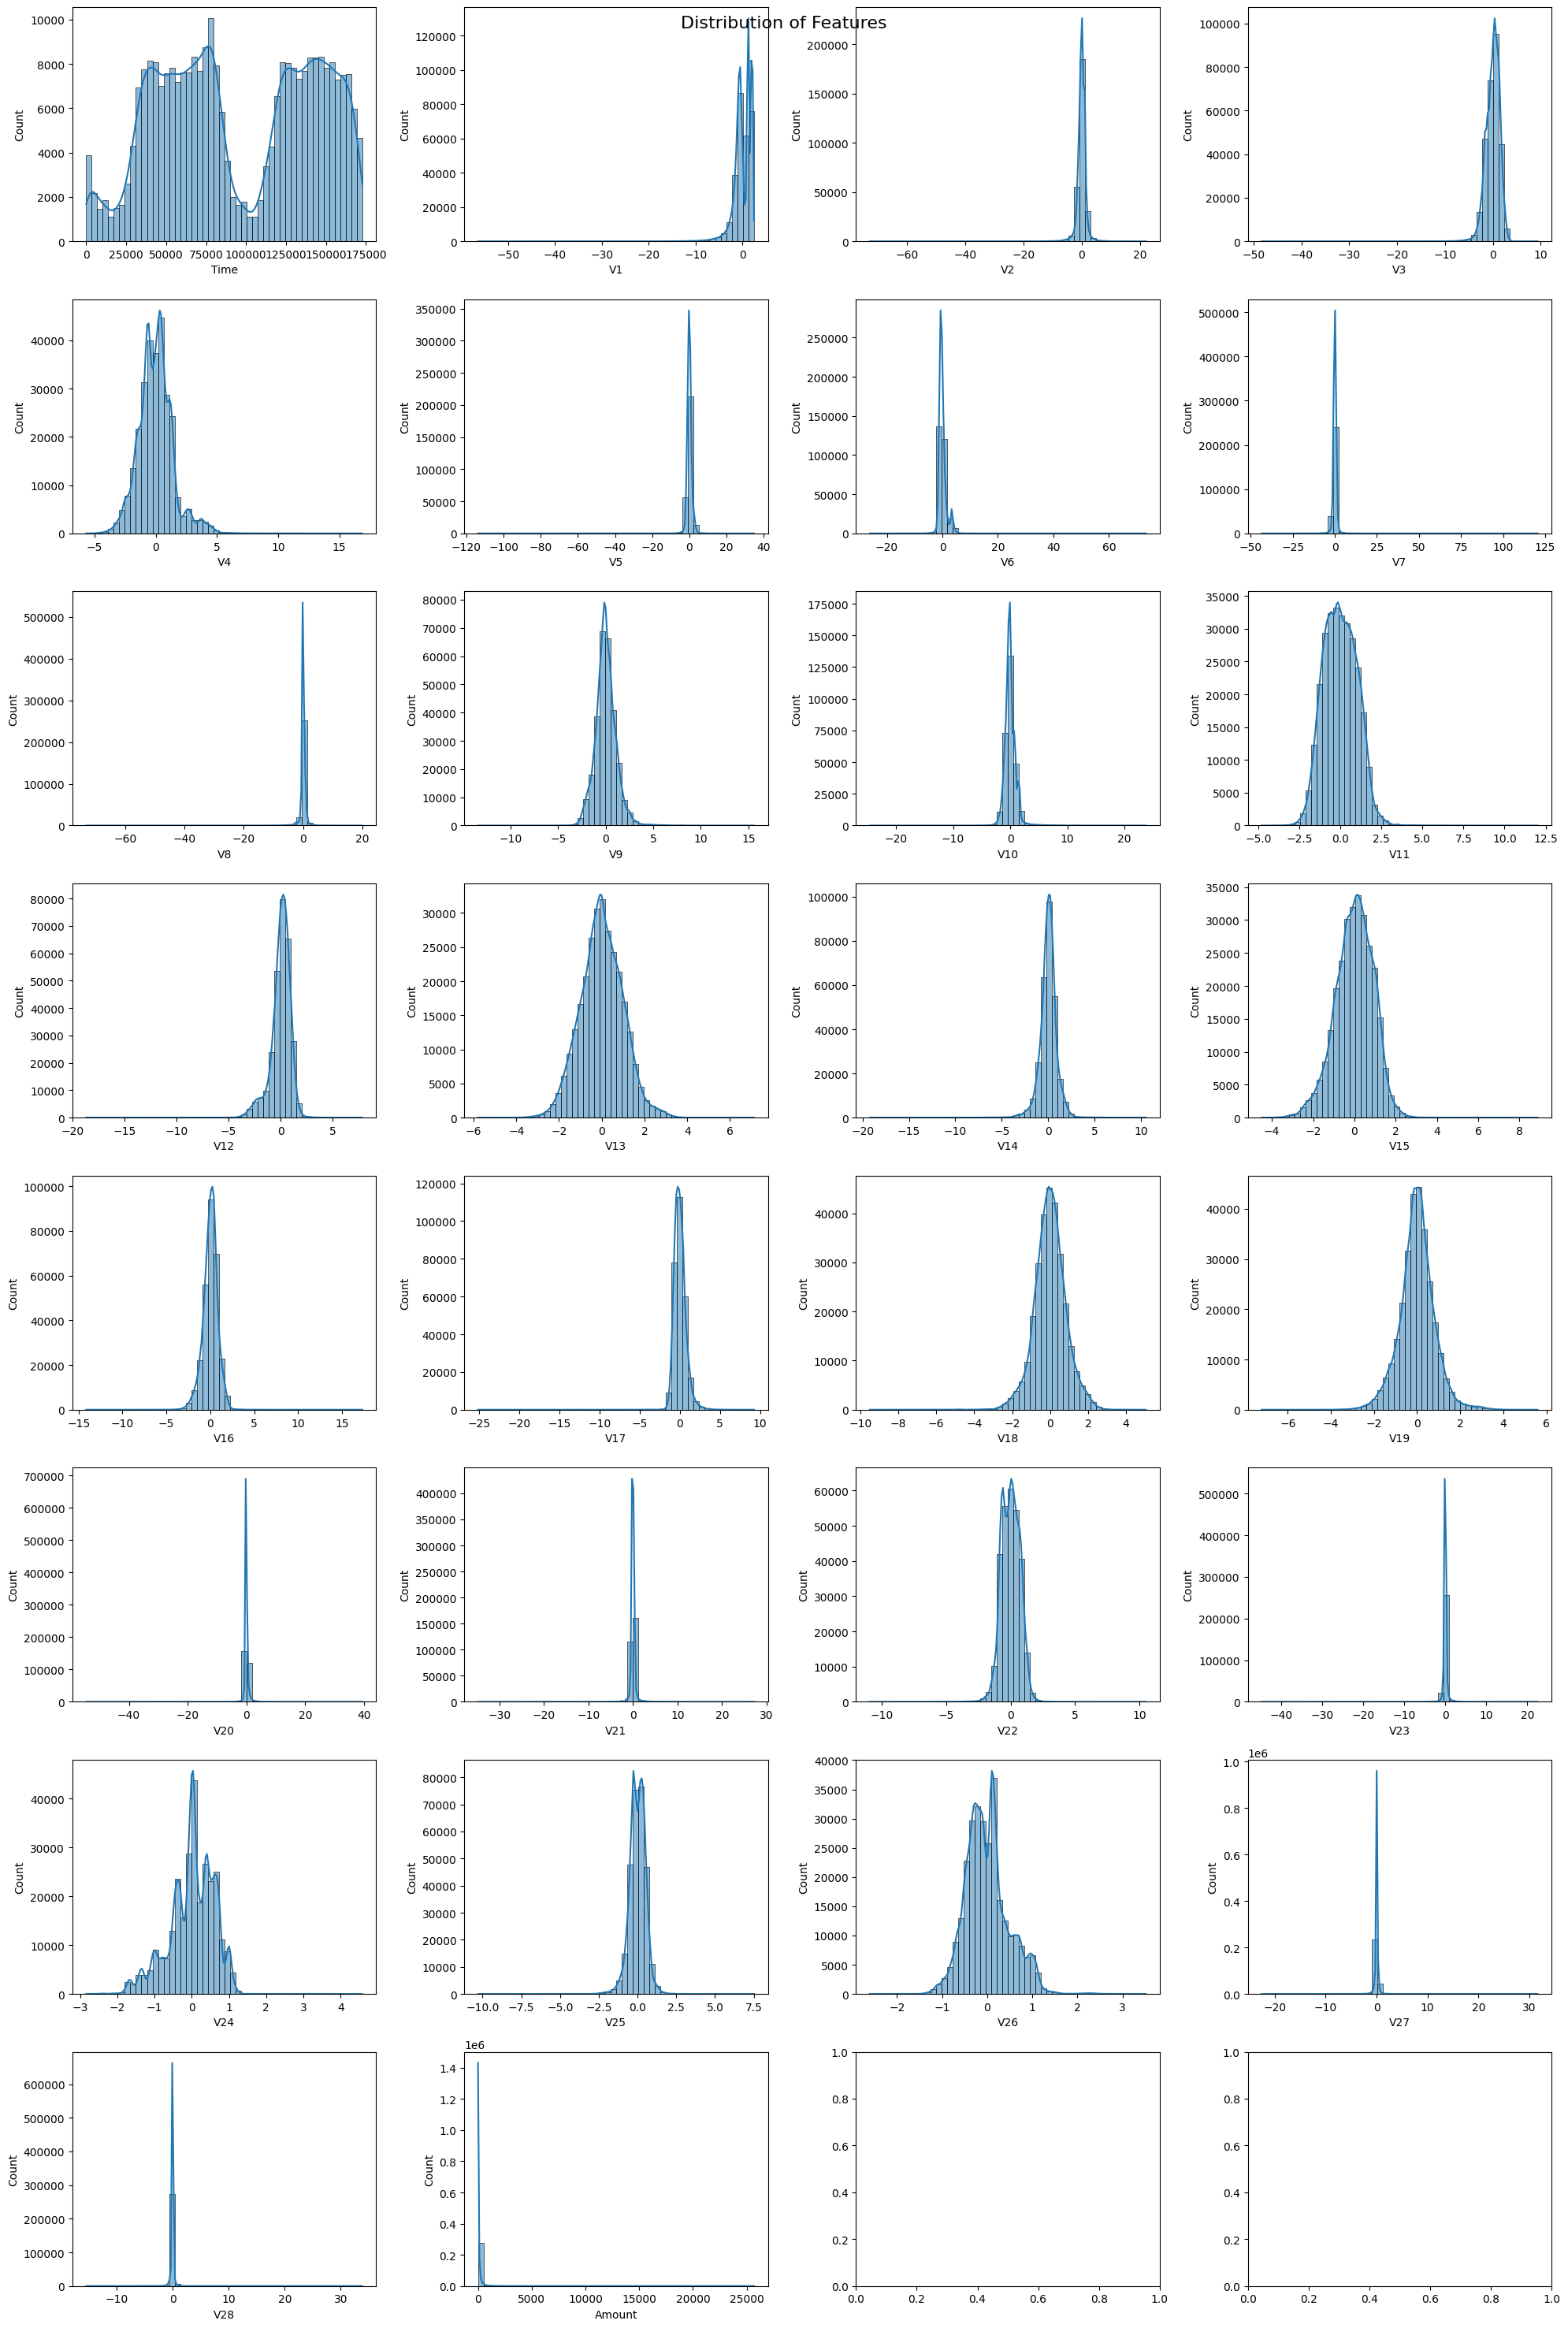

In [7]:
# Basic Dataset Information
print("\n--- Basic Dataset Information ---")
print("Data Types:\n", data.dtypes)  # Data types of each column
print("Summary Statistics:\n", data.describe())  # Summary statistics

# Check for missing values
print(data.isnull().sum())

# Correlation Analysis
print("\n--- Correlation Matrix ---")
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Plot Distribution of Classes
print("\n--- Class Distribution ---")
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraud (1) and Non-Fraud (0) Transactions')
plt.show()

# Plot Distribution of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Plot Distribution of 'Time'
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()

# Analyze Distribution of Each Feature
print("\n--- Feature Distribution Analysis ---")
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 30)) # Changed nrows to 8 to accomodate all features
fig.suptitle('Distribution of Features', fontsize=16)
for idx, col in enumerate(data.columns):
    if col != 'Class':
        sns.histplot(data[col], bins=50, ax=axes[idx // 4, idx % 4], kde=True)
plt.tight_layout()
plt.show()


#Feature Engineering and Data Preprocessing

In [8]:
# Standardize 'Amount' and 'Time' columns
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE for handling class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(f'Original dataset shape: {X.shape}, {y.shape}')
print(f'Resampled dataset shape: {X_res.shape}, {y_res.shape}')


Original dataset shape: (284807, 30), (284807,)
Resampled dataset shape: (568630, 30), (568630,)


#Train-Test Split#

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


# Model Training

In [10]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Train Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

#Model Evaluation

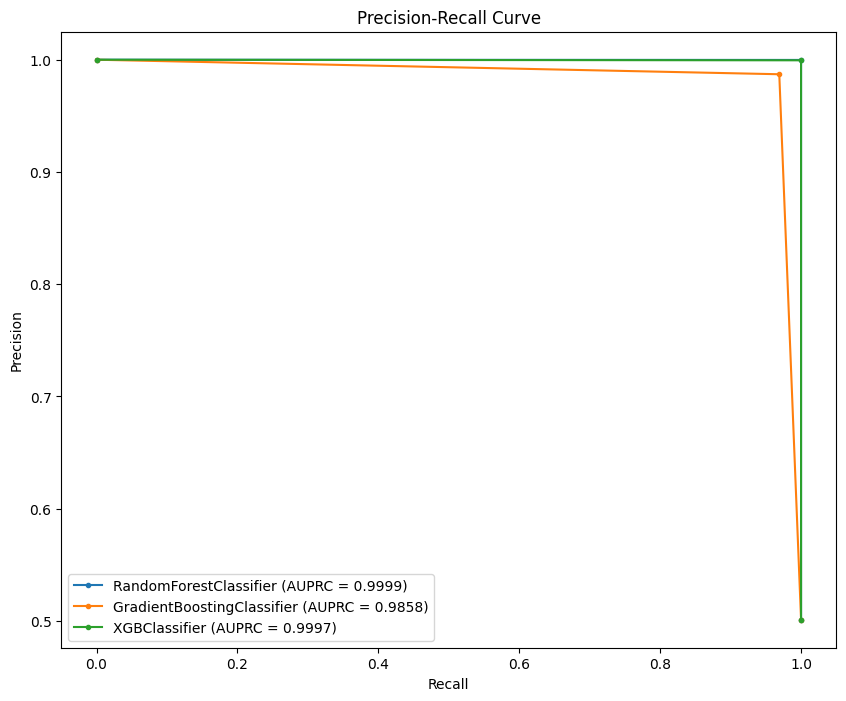

Accuracy: 0.9999
Confusion Matrix:
 [[56739    11]
 [    0 56976]]
Area Under Precision-Recall Curve (AUPRC): 1.0000


In [11]:
# Define a function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUPRC = {auc_score:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.title('Precision-Recall Curve')

# Plot the Precision-Recall curve for each model
plt.figure(figsize=(10, 8))
for model in [rf, gb, xgb]:
    y_pred = model.predict(X_test)
    plot_precision_recall_curve(y_test, y_pred, model.__class__.__name__)
plt.show()

# Evaluate accuracy
y_pred = rf.predict(X_test)  # Using Random Forest as an example
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute precision-recall curve and AUPRC
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Use Random Forest's probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)
print(f'Area Under Precision-Recall Curve (AUPRC): {auprc:.4f}')


#Model Persistence

In [12]:
# Save the model
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(gb, 'gradient_boosting_model.pkl')
joblib.dump(xgb, 'xgboost_model.pkl')

# Load the saved model (choose one depending on which model you want to test)
model_rf = joblib.load('random_forest_model.pkl')  # Load Random Forest model
model_gb = joblib.load('gradient_boosting_model.pkl')  # Load Gradient Boosting model
model_xgb = joblib.load('xgboost_model.pkl')  # Load XGBoost model


#Making Predictions

In [13]:
# Example new input data
new_data = pd.DataFrame({
    'Time': [0],
    'V1': [-1.359807134],
    'V2': [-0.072781173],
    'V3': [2.536346738],
    'V4': [1.378155224],
    'V5': [-0.33832077],
    'V6': [0.462387778],
    'V7': [0.239598554],
    'V8': [0.098697901],
    'V9': [0.36378697],
    'V10': [0.090794172],
    'V11': [-0.551599533],
    'V12': [-0.617800856],
    'V13': [-0.991389847],
    'V14': [-0.311169354],
    'V15': [1.468176972],
    'V16': [-0.470400525],
    'V17': [0.207971242],
    'V18': [0.02579058],
    'V19': [0.40399296],
    'V20': [0.251412098],
    'V21': [-0.018306778],
    'V22': [0.277837576],
    'V23': [-0.11047391],
    'V24': [0.066928075],
    'V25': [0.128539358],
    'V26': [-0.189114844],
    'V27': [0.133558377],
    'V28': [-0.021053053],
    'Amount': [149.62]
})

# Make a prediction for the new data
new_prediction = model_rf.predict(new_data)
new_prediction_proba = model_rf.predict_proba(new_data)[:, 1]  # Probability of fraud

print(f"Predicted Class: {new_prediction[0]} (1 indicates fraud, 0 indicates non-fraud)")
print(f"Probability of Fraud: {new_prediction_proba[0]:.4f}")


Predicted Class: 0 (1 indicates fraud, 0 indicates non-fraud)
Probability of Fraud: 0.0100
